<a href="https://colab.research.google.com/github/bwilli2086/data_analytics/blob/main/Python/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime
import plotly.express as px

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [2]:
df_state = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
ny_state=df_state.loc[df_state['state']=='New York']
ny=df_counties.loc[df_counties['state']=='New York']
fl=df_state.loc[df_state['state']=='Florida']
ca=df_state.loc[df_state['state']=='California']
tx=df_state.loc[df_state['state']=='Texas']
az=df_state.loc[df_state['state']=='Arizona']



In [3]:
#review NYS Counties Data

ny.groupby(['county'], sort=False)[['cases']].describe()



cases                 ...                     
               count           mean  ...        75%       max
county                               ...                     
New York City  323.0  229800.526316  ...  265792.00  529834.0
Westchester    320.0   36928.465625  ...   40584.75   83707.0
Nassau         319.0   45239.131661  ...   49924.00  112702.0
Rockland       318.0   14931.820755  ...   18088.50   31509.0
Saratoga       317.0    1396.539432  ...    1383.00    8984.0
Suffolk        316.0   46132.996835  ...   49324.00  125925.0
Ulster         316.0    2302.901899  ...    2540.25    7548.0
Monroe         313.0    8440.888179  ...    7597.00   43660.0
Albany         312.0    3579.506410  ...    3730.50   15981.0
Delaware       312.0     194.153846  ...     188.25     990.0
Dutchess       312.0    5182.548077  ...    5551.50   16327.0
Herkimer       312.0     480.695513  ...     396.75    3528.0
Orange         312.0   12068.224359  ...   13859.75   28401.0
Schenectady    311.0    1633.154341  ...    1611.00    8480.0
Broome         310.0    2372.996774  ...    3731.00   10866.0
Tioga          310.0     467.193548  ...     696.50    2167.0
Tompkins       310.0     546.580645  ...     654.50    2613.0
Erie           309.0   13112.313916  ...   13531.00   51384.0
Greene         309.0     429.087379  ...     516.00    1995.0
Montgomery     309.0     319.135922  ...     273.00    2167.0
Putnam         309.0    1823.336570  ...    1861.00    6386.0
Allegany       308.0     383.386364  ...     352.00    2328.0
Onondaga       308.0    5792.321429  ...    5770.25   27190.0
Ontario        308.0     757.616883  ...     712.75    4647.0
Clinton        307.0     282.263844  ...     271.50    2091.0
Rensselaer     307.0    1174.228013  ...    1127.50    6693.0
Sullivan       307.0    1574.182410  ...    1821.50    3765.0
Wyoming        307.0     299.703583  ...     204.00    2114.0
Chenango       306.0     352.310458  ...     427.25    1704.0
Essex          306.0     171.091503  ...     211.75     967.0
Hamilton       306.0      23.823529  ...      19.00     145.0
Jefferson      306.0     365.702614  ...     228.75    3094.0
Livingston     306.0     408.450980  ...     354.50    2645.0
Warren         306.0     418.071895  ...     468.75    2004.0
Washington     306.0     328.307190  ...     352.25    1438.0
Schoharie      305.0     135.800000  ...     116.00     882.0
Wayne          305.0     586.298361  ...     573.00    3606.0
Columbia       304.0     646.220395  ...     740.50    2397.0
Fulton         304.0     392.703947  ...     367.25    2039.0
Genesee        304.0     599.319079  ...     414.75    3630.0
Niagara        304.0    2366.404605  ...    2157.75   11822.0
Oneida         304.0    3180.953947  ...    2874.25   16502.0
Steuben        303.0     866.788779  ...    1120.00    4541.0
Cortland       302.0     450.463576  ...     596.50    2604.0
Madison        302.0     650.784768  ...     600.00    3073.0
St. Lawrence   302.0     538.950331  ...     434.00    3496.0
Cayuga         301.0     556.724252  ...     465.00    4310.0
Oswego         301.0     777.252492  ...     669.00    4816.0
Otsego         301.0     333.345515  ...     422.00    1623.0
Chemung        300.0    1148.133333  ...    1929.25    5534.0
Orleans        300.0     420.190000  ...     418.75    1898.0
Chautauqua     299.0     842.414716  ...    1045.50    5460.0
Franklin       299.0     152.003344  ...      96.00    1103.0
Cattaraugus    296.0     559.706081  ...     571.50    3344.0
Schuyler       296.0     121.780405  ...     164.50     710.0
Lewis          295.0     183.525424  ...     166.00    1451.0
Unknown         10.0       0.000000  ...       0.00       0.0
Seneca         293.0     192.501706  ...     163.00    1203.0
Yates          291.0     134.975945  ...     154.50     795.0

[59 rows x 8 columns]

In [ ]:
#review NYS Data head

ny_state.head(10)

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
338,2020-03-06,New York,36,44,0
369,2020-03-07,New York,36,89,0
404,2020-03-08,New York,36,106,0
440,2020-03-09,New York,36,142,0
478,2020-03-10,New York,36,173,0


In [ ]:
#review NYS Data head

ny_state.tail(10)

,date,state,fips,cases,deaths
17097,2021-01-07,New York,36,1082142,38683
17152,2021-01-08,New York,36,1101702,38846
17207,2021-01-09,New York,36,1119541,39041
17262,2021-01-10,New York,36,1135849,39208
17317,2021-01-11,New York,36,1150028,39404
17372,2021-01-12,New York,36,1164819,39588
17427,2021-01-13,New York,36,1179523,39760
17482,2021-01-14,New York,36,1193710,39997
17537,2021-01-15,New York,36,1213179,40203
17592,2021-01-16,New York,36,1229124,40376


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

**1. Analyzing New York state data for Covid 19**

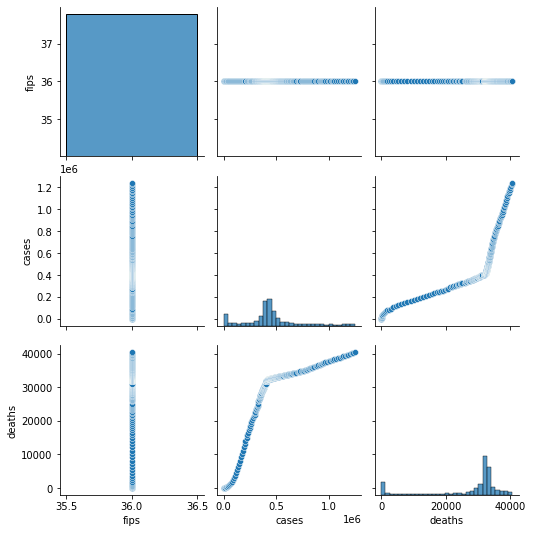

In [ ]:
sns.pairplot(ny_state)


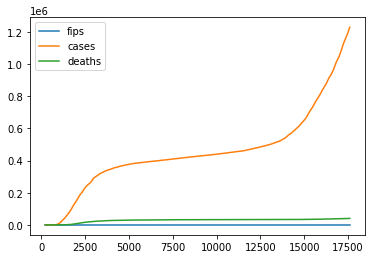

In [ ]:
ny_state.plot()

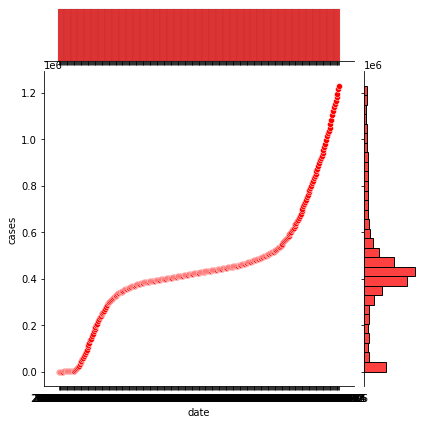

In [ ]:
sns.jointplot(x='date', y='cases', data=ny_state, color='red')

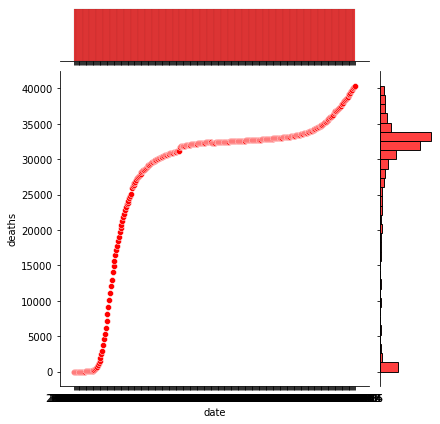

In [ ]:
sns.jointplot(x='date', y='deaths', data=ny_state, color='red')

**2. Find new covid 19 cases daily basis (new cases added everyday)**

In [130]:
#filter cases for last 30 days to print daily infection total
ny_date0=ny_state
ny_date0=ny_date0[(ny_date0['date']<='2021-01-16') & (ny_date0['date']>='2020-12-15')]
infection=ny_date0['cases'] - ny_date0['cases'].shift()
rate=0
d=ny_date0.date.values

for rate in range(len(ny_date0)):
    total=infection.values[rate]
    print('On date:',d[rate],'the were:',total,'new infections')


On date: 2020-12-15 the were: nan new infections
On date: 2020-12-16 the were: 9378.0 new infections
On date: 2020-12-17 the were: 10498.0 new infections
On date: 2020-12-18 the were: 12606.0 new infections
On date: 2020-12-19 the were: 9913.0 new infections
On date: 2020-12-20 the were: 9454.0 new infections
On date: 2020-12-21 the were: 9456.0 new infections
On date: 2020-12-22 the were: 10299.0 new infections
On date: 2020-12-23 the were: 11740.0 new infections
On date: 2020-12-24 the were: 13347.0 new infections
On date: 2020-12-25 the were: 12881.0 new infections
On date: 2020-12-26 the were: 11048.0 new infections
On date: 2020-12-27 the were: 8205.0 new infections
On date: 2020-12-28 the were: 10334.0 new infections
On date: 2020-12-29 the were: 12020.0 new infections
On date: 2020-12-30 the were: 12917.0 new infections
On date: 2020-12-31 the were: 15393.0 new infections
On date: 2021-01-01 the were: 17033.0 new infections
On date: 2021-01-02 the were: 15849.0 new infections
On

# Task4: Understand NY covid 19 data in last 30 days

In [138]:
ny_date=ny_state
ny_date=ny_date[(ny_date['date']<='2021-01-16') & (ny_date['date']>='2020-12-16')]
ny_date.describe()


,fips,cases,deaths
count,32.0,3.200000e+01,32.000000
mean,36.0,1.000154e+06,37749.281250
std,0.0,1.280447e+05,1455.050542
min,36.0,8.089290e+05,35522.000000
25%,36.0,8.929052e+05,36566.500000
50%,36.0,9.875565e+05,37645.000000
75%,36.0,1.106162e+06,38894.750000
max,36.0,1.229124e+06,40376.000000


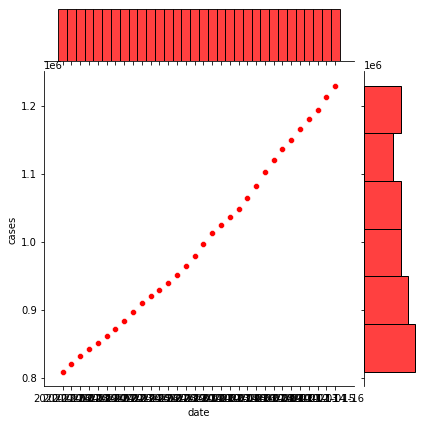

In [137]:
sns.jointplot(x='date', y='cases', data=ny_date, color='red')

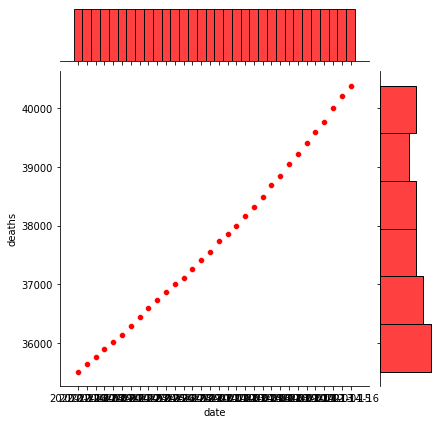

In [136]:
sns.jointplot(x='date', y='deaths', data=ny_date, color='red')

# Task5: Comparing Covid 19 data with different states

**Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona**

In [139]:
frame=(ny_state,fl,ca,az,tx)
state_comp=pd.concat(frame)
state_comp



,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
...,...,...,...,...,...
17440,2021-01-13,Texas,48,2042009,31396
17495,2021-01-14,Texas,48,2071932,31819
17550,2021-01-15,Texas,48,2096526,32212
17605,2021-01-16,Texas,48,2114858,32581


In [140]:
state_date=state_comp
state_date=state_date[(state_date['date']<='2021-01-16') & (state_date['date']>='2020-07-01')]
state_date.groupby(['state'], sort=False)[['cases']].describe()


cases                              ...                                 
            count         mean            std  ...       50%         75%        max
state                                          ...                                 
New York    200.0   573784.430  212028.127064  ...  475625.5   634655.00  1229124.0
Florida     200.0   782872.885  328105.572357  ...  727459.0   980581.25  1560178.0
California  200.0  1046375.090  651800.183471  ...  849306.0  1196372.75  2974966.0
Arizona     200.0   274762.015  135891.255669  ...  223754.0   319714.75   670234.0
Texas       200.0   930968.555  490087.513205  ...  823986.5  1230155.50  2114858.0

[5 rows x 8 columns]

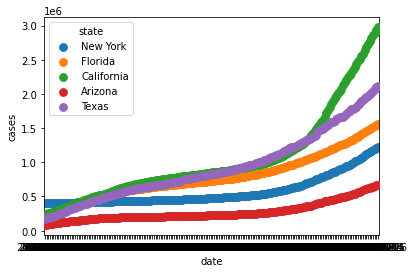

In [141]:
sns.pointplot(x='date', y='cases', data=state_date,hue="state")

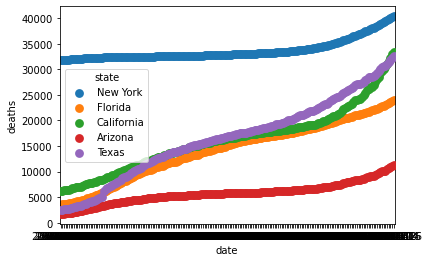

In [142]:
sns.pointplot(x='date', y='deaths', data=state_date,hue="state")


# Task6: Conclusion

Below are the conclusions:

1.   Conclusion 1
     As of January 16th New York State had a total of 1,229,124 COVID 19 cases and 40,376 deaths. The highest count of cases are in New York City with 524,231 and the lowest being Hamilton County with only 145. Looking at the pair plot graph we see that there is a collation between the increase in cases and death. Initially, there was a high relation between the increase in cases and the increase in deaths, but over time, that relationship decreased, where a 10% increase in cases didn't mean a 10% increase in death,this can be caused by the advancements in treating the virus. Looking at the graph of the cases by date, we see a high initial increase in cases and deaths, as we transition to the summer dates we see a decrease in case and death rate decrease.eventually the rate increases again at the end of summer. Looking at the last 30 days, we see that the case of infection in New York increased from 808k to 1.229 million cases. This shows a 52% increase in cases. At the same time we see that deaths increased from 35,522 to 40376. This shows a 14% increase in deaths. This again validates my first point that there is a collation between the cases infection rate and death rate, but they are not related directly.

2.   Conclusion 2
     For the second analyst, I compared the states of New York, Florida, Texas, Arizona and California. The filtered the data for July, 01st, 2020 to January 16th, 2021. When looking at this data we see initially, the state of New York had the highest cases of infections and death. New York continues to  be the state with the highest total death, with California in second and Texas in third. Where we see a change is total cases. Looking from July till January, we see that New York moved from the highest total cases, to the second lowest of the five states. California now has the highest total cases count, outpacing Texas by more than 40%.

